In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/GoldenSnow-Xue/schulich_data_science/main/messy_data.csv')

In [ ]:
# df = pd.read_csv(r"C:\Users\Golden Snow\Desktop\MBAN Study\MBAN 6110 S - Data Science I\messy_data.csv")

In [3]:
df

,Age,Income,Gender,Product,Quantity
0,56,59544.57663,Female,D,3
1,46,36399.18997,Female,NaN,1
2,32,57140.63881,Female,D,2
3,60,69554.91903,Male,C,5
4,25,53173.80518,Female,D,2
...,...,...,...,...,...
100,61,37341.55459,Male,D,5
101,55,35516.63492,Female,A,3
102,31,53254.05089,Male,B,2
103,21,NaN,Male,B,2


In [4]:
# always start with info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       105 non-null    int64  
 1   Income    94 non-null     float64
 2   Gender    105 non-null    object 
 3   Product   100 non-null    object 
 4   Quantity  105 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.2+ KB


In [5]:
df.describe()

,Age,Income,Quantity
count,105.000000,94.000000,105.00000
mean,42.076190,52867.862808,3.20000
std,15.940813,29896.579420,1.44382
min,18.000000,20901.331720,1.00000
25%,31.000000,37814.315255,2.00000
50%,41.000000,48760.369705,3.00000
75%,55.000000,61644.277868,5.00000
max,120.000000,300000.000000,5.00000


In [6]:
df.describe(include='all')

,Age,Income,Gender,Product,Quantity
count,105.000000,94.000000,105,100,105.00000
unique,NaN,NaN,2,4,NaN
top,NaN,NaN,Female,D,NaN
freq,NaN,NaN,58,28,NaN
mean,42.076190,52867.862808,NaN,NaN,3.20000
std,15.940813,29896.579420,NaN,NaN,1.44382
min,18.000000,20901.331720,NaN,NaN,1.00000
25%,31.000000,37814.315255,NaN,NaN,2.00000
50%,41.000000,48760.369705,NaN,NaN,3.00000
75%,55.000000,61644.277868,NaN,NaN,5.00000


In [7]:
# Visualiztion
# pip install seaborn
# https://seaborn.pydata.org/examples/index.html
import seaborn as sns

<AxesSubplot:xlabel='Income', ylabel='Count'>

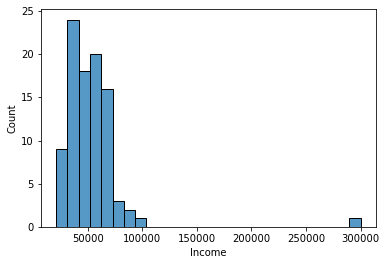

In [8]:
sns.histplot(df['Income'])
# frequency plot: understand the probability 

c:\Users\Golden Snow\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

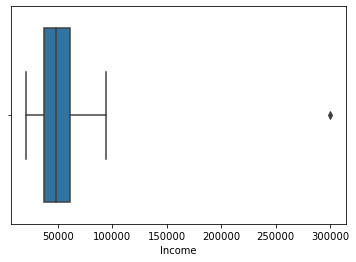

In [11]:
sns.boxplot(df['Income'])

In [21]:
sns.boxplot(data = df['Income'], y = 'Income')

ValueError: Could not interpret input 'Income'

In [19]:
# write a statement to filter the data set and identify the outlier
df[df['Income'] > 250000]

,Age,Income,Gender,Product,Quantity


In [16]:
# drop the outlier
df.drop(99, axis =0 ,inplace=True)

c:\Users\Golden Snow\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

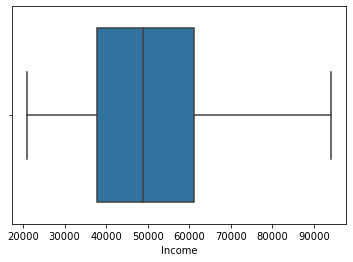

In [17]:
sns.boxplot(df['Income'])

<AxesSubplot:xlabel='Income', ylabel='Count'>

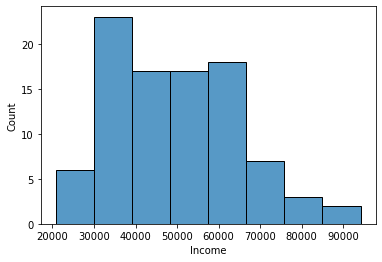

In [18]:
sns.histplot(df['Income'])

<AxesSubplot:xlabel='Gender', ylabel='Income'>

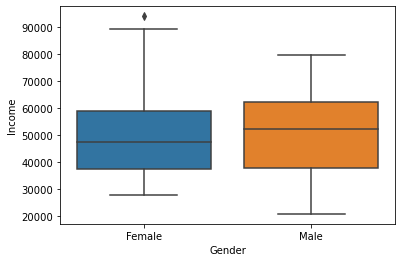

In [20]:
sns.boxplot(data = df, x = 'Gender', y = 'Income')

In [22]:
df

,Age,Income,Gender,Product,Quantity
0,56,59544.57663,Female,D,3
1,46,36399.18997,Female,NaN,1
2,32,57140.63881,Female,D,2
3,60,69554.91903,Male,C,5
4,25,53173.80518,Female,D,2
...,...,...,...,...,...
100,61,37341.55459,Male,D,5
101,55,35516.63492,Female,A,3
102,31,53254.05089,Male,B,2
103,21,NaN,Male,B,2


<AxesSubplot:xlabel='Age', ylabel='Income'>

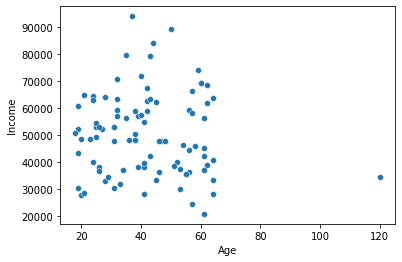

In [25]:
sns.scatterplot(data = df, x = 'Age', y = 'Income')

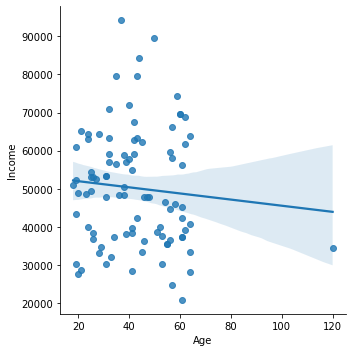

In [26]:
sns.lmplot(data = df, x = 'Age', y = 'Income', fit_reg=True)
# fit line best
# confidence level ci

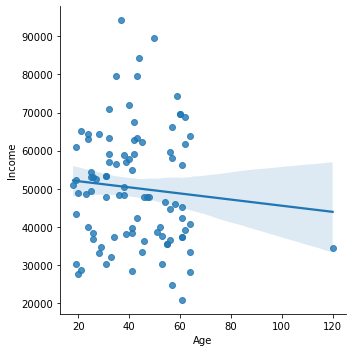

In [27]:
sns.lmplot(data = df, x = 'Age', y = 'Income', fit_reg=True, ci = 90)

In [28]:
df.drop(df[df['Age']==120].index, axis=0, inplace=True)

In [29]:
df[df['Age']==56].index

Int64Index([0, 6, 41], dtype='int64')

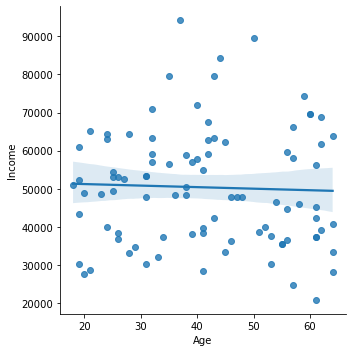

In [30]:
sns.lmplot(data = df, x = 'Age', y = 'Income', fit_reg=True)

In [31]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# df.drop_duplicates(subset = '', inplace=True)

In [32]:
df['Product'] = df['Product'].fillna('Other')

In [34]:
df.groupby('Gender')['Income'].mean()

Gender
Female    50205.793962
Male      50795.175595
Name: Income, dtype: float64

In [35]:
df.groupby('Product')['Income'].mean()

Product
A        52599.570360
B        48693.364717
C        50742.171429
D        50377.772819
Other    47685.057048
Name: Income, dtype: float64

In [36]:
df['Income'] = df['Income'].fillna(df['Income'].mean())